In [689]:
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout, SimpleRNN
import os

In [690]:

df = pd.read_csv('../input/XPEV.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-07-27,12.030000,12.090000,11.270000,11.690000,11.690000,64068500
1,2020-07-28,11.480000,12.640000,11.380000,12.270000,12.270000,90075800
2,2020-07-29,12.650000,13.000000,12.430000,12.700000,12.700000,69552600
3,2020-07-30,12.620000,12.950000,12.070000,12.200000,12.200000,64952900
4,2020-07-31,12.410000,12.590000,11.730000,11.940000,11.940000,61620400
...,...,...,...,...,...,...,...
248,2021-07-21,44.099998,47.380001,44.000000,46.770000,46.770000,59851700
249,2021-07-22,46.959999,47.380001,45.470001,46.070000,46.070000,38936400
250,2021-07-23,43.669998,44.500000,42.500000,43.990002,43.990002,49472400
251,2021-07-26,42.669998,44.880001,41.930000,43.169998,43.169998,54629300


In [691]:
# get the number of rows and columns in the data set
df.shape

(253, 7)

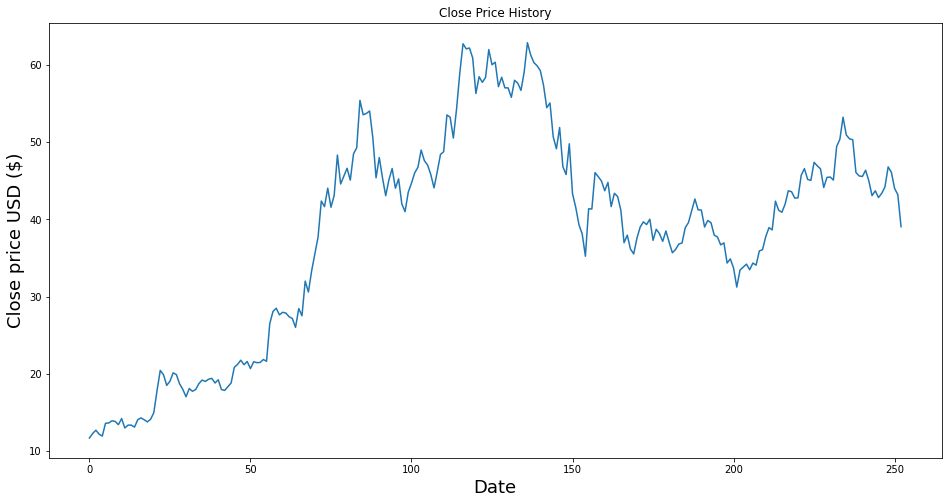

In [692]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.show()

In [693]:
# create a new df with only the "close" column
data = df.filter({'Close'})
# convert the df to a numpy array
dataset = data.values
# get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

203

In [694]:
# scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[0.        ],
       [0.0113392 ],
       [0.01974585],
       [0.00997067],
       [0.00488759],
       [0.03734115],
       [0.03812317],
       [0.04359726],
       [0.04203324],
       [0.03382209],
       [0.04926686],
       [0.02541544],
       [0.03264907],
       [0.03264907],
       [0.02756598],
       [0.04613881],
       [0.05102639],
       [0.04633431],
       [0.04086022],
       [0.04750733],
       [0.06412512],
       [0.1202346 ],
       [0.17106551],
       [0.16011728],
       [0.13313783],
       [0.14349953],
       [0.1648094 ],
       [0.16050831],
       [0.13704792],
       [0.12297165],
       [0.10439885],
       [0.12512219],
       [0.11827957],
       [0.12277613],
       [0.13763441],
       [0.14662759],
       [0.1431085 ],
       [0.14877808],
       [0.15092864],
       [0.13919842],
       [0.14740958],
       [0.12258063],
       [0.12043011],
       [0.12961877],
       [0.13919842],
       [0.17908113],
       [0.18631474],
       [0.196

In [695]:
## create the training data set
# create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])

print(x_train)
print(y_train)

[array([0.        , 0.0113392 , 0.01974585, 0.00997067, 0.00488759,
       0.03734115, 0.03812317, 0.04359726, 0.04203324, 0.03382209,
       0.04926686, 0.02541544, 0.03264907, 0.03264907, 0.02756598,
       0.04613881, 0.05102639, 0.04633431, 0.04086022, 0.04750733,
       0.06412512, 0.1202346 , 0.17106551, 0.16011728, 0.13313783,
       0.14349953, 0.1648094 , 0.16050831, 0.13704792, 0.12297165,
       0.10439885, 0.12512219, 0.11827957, 0.12277613, 0.13763441,
       0.14662759, 0.1431085 , 0.14877808, 0.15092864, 0.13919842,
       0.14740958, 0.12258063, 0.12043011, 0.12961877, 0.13919842,
       0.17908113, 0.18631474, 0.19687195, 0.18553275, 0.19354839,
       0.17556207, 0.19296186, 0.19061586, 0.19120233, 0.19863148,
       0.19413492, 0.28954057, 0.3202346 , 0.32825024, 0.31163243]), array([0.0113392 , 0.01974585, 0.00997067, 0.00488759, 0.03734115,
       0.03812317, 0.04359726, 0.04203324, 0.03382209, 0.04926686,
       0.02541544, 0.03264907, 0.03264907, 0.02756598, 0.04

In [696]:
# convert the x_train and y_train to number arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [697]:
# reshape the data, input [samples, time steps, features] which is require for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(143, 60, 1)

In [698]:
# build the SimpleRNN model
model = Sequential()
model.add(SimpleRNN(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(SimpleRNN(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [699]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [700]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)
# model.save('../out/APPL_LSTM_1.h5')

143/143 [==============================] - 16s 15ms/step - loss: 0.1510


In [701]:
## create the testing data set
# create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60:, :]
# create the data sets x_test nad y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])

In [702]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [703]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [704]:
# get the models predicted price values
# model = load_model('../out/APPL_LSTM_1.h5')
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(predictions)


[[37.781258]
 [38.79482 ]
 [40.12084 ]
 [39.422237]
 [40.43352 ]
 [40.897728]
 [40.725853]
 [40.58339 ]
 [42.963   ]
 [41.974087]
 [44.362045]
 [45.265106]
 [45.637936]
 [46.684643]
 [45.460903]
 [47.54711 ]
 [47.258698]
 [47.187057]
 [46.96371 ]
 [48.802284]
 [48.19217 ]
 [48.908855]
 [48.56098 ]
 [49.73606 ]
 [49.869633]
 [49.543236]
 [48.55053 ]
 [49.41316 ]
 [48.19179 ]
 [48.264465]
 [49.486256]
 [50.95435 ]
 [53.40761 ]
 [52.62443 ]
 [54.322834]
 [53.050907]
 [51.677055]
 [49.820408]
 [48.358883]
 [48.663708]
 [47.512665]
 [46.542763]
 [47.0377  ]
 [46.238617]
 [46.15936 ]
 [46.502953]
 [48.217285]
 [49.025425]
 [49.04694 ]
 [48.52913 ]]


In [705]:
# get the rmse (root mean squared error)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.535847805219727

/Users/anhnguyenhoang/miniconda/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


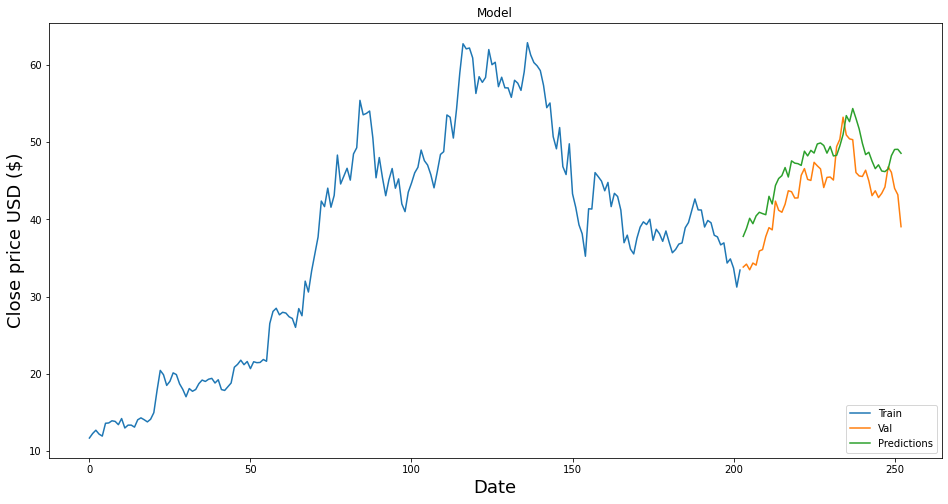

In [706]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Prediction'] = predictions
# visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [707]:
# show the valid and predicted prices
valid

,Close,Prediction
203,33.810001,37.781258
204,34.189999,38.794819
205,33.459999,40.120838
206,34.330002,39.422237
207,34.060001,40.433521
208,35.889999,40.897728
209,36.070000,40.725853
210,37.759998,40.583389
211,38.910000,42.963001
212,38.619999,41.974087


In [708]:
valid.index=pd.to_datetime(df['Date'].loc[training_data_len:].copy())
valid.to_csv('../out/SimpleRNN/XPEV.csv')
valid

,Close,Prediction
Date,,
2021-05-17,33.810001,37.781258
2021-05-18,34.189999,38.794819
2021-05-19,33.459999,40.120838
2021-05-20,34.330002,39.422237
2021-05-21,34.060001,40.433521
2021-05-24,35.889999,40.897728
2021-05-25,36.070000,40.725853
2021-05-26,37.759998,40.583389
2021-05-27,38.910000,42.963001
